<a href="https://colab.research.google.com/github/kavyaanjali-nri/Age-Height-Weight-Speed/blob/main/House%20Size%20VS%20House%20Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random

In [2]:
# Introduction to ml
# Used libraries - random, numpy, pandas,

In [ ]:
# Teram in machine learning

# 1. collection : data used for training, validting and testing the machine learning modle


# 2. feature (x) : Independent variabal or input variabal -used to predict the target variable

# 3. Target (y) : dependent variable -output - we want to predint-example : predicting number of bedroom
# 4. training data : subset of dataset used to train the model
# 5. testing data : subset of dataset used  to validata the trained modle
# 6. model : mathematical representation of relationship between feature and target
# 7. Suppervised learning (SL): Training the data based on labled data / model learns from known / labeled data


# 8. Regression : method to predict continuos values from a model - suppervised learning
# 9.overfitting : when a model iearns from training data too well, includes noise - perform poorly new data
# 10. Underfitting : model is too simpler and does not capture patterns in data


## categories in machine learning :
# 1. suppervised learning :
# model learns from labeled data - i/o pairs
# exmaple : linear regression, decision trees,random forest, SVM
# best use casa so far : house price prediction based on previous/historical data


# 2. Unsuppervised iearning :
# model find new patterns in unlabeled data without predefined data/labels
# exmaple : clustering (Kmeans), PCA
# use casa : customer segmentation in markerting

# 3.Reinforcement learning:
# model learns by interacting with enviroment and receiving the reqrde or penalities
# exmaple : deep learning, alphaGo,...
# Best use casa : Self car driving vehicles, self learning AI bots,SLAM

In [ ]:
# Example : PRedicting the house price - random dataset - generated
# steps:
# 1. generate a random datassion
# 2. train a MLmodel - linear regression
# 3. evaluate the model
# 4. make prediction

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
# step 1: generate a random dataset
np.random.seed(42) # used to set same sequence of values for the random package
numSamples = 100

size = np.random.randint(800,3000,numSamples) #create numpSamles number of samples from (800,3000)
bedrooms = np.random.randint(1,6, numSamples)
washrooms = np.random.randint(1,8, numSamples)
localityScore = np.random.randint(1,11, numSamples)


# Generate house prices with randomness
houseprice = (size * 3000)+(bedrooms*30000)+(washrooms*20000)+(localityScore*10000)+np.random.randint(-30000,30000, numSamples)

# Create a dataframe
df =pd.DataFrame(
    {
        "size":size,
        "bedrooms":bedrooms,
        "washrooms":washrooms,
        "localityScore":localityScore,
        "houseprice":houseprice,
    }
)





In [5]:
df

,size,bedrooms,washrooms,localityScore,houseprice
0,1660,2,1,5,5126175
1,2094,2,7,6,6519805
2,1930,4,2,3,5955237
3,1895,5,1,9,5964711
4,2438,3,3,5,7504056
...,...,...,...,...,...
95,1197,3,4,5,3784373
96,1670,3,3,1,5152161
97,1192,4,1,10,3817996
98,1006,4,1,10,3255122


In [6]:
# step 2 : train a ML model - linear regression

# package (installation) requirements:
# pip install scikit-learn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [21]:
X= df[['size','bedrooms','washrooms','localityScore',]]
Y= df['houseprice']

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

model = LinearRegression()
model = model.fit(X_train, Y_train)

In [9]:
# step 3 : Evaluate the model
#package Requirements :
#sklearn.metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error

Y_pred = model.predict(X_test)

MAE = mean_absolute_error(Y_test,Y_pred)
MSE = mean_squared_error(Y_test,Y_pred)
RMSE = np.sqrt(MSE)

print(f'Mean Absolute Error: {MAE}')
print(f'Mean squared Error: {MSE}')
print(f'Root Mean squared Error: {RMSE}')

Mean Absolute Error: 14454.371785285068
Mean squared Error: 296776935.98947877
Root Mean squared Error: 17227.214980648463


In [19]:
# step 4 : make prediction
newhouse = np.array([[4000,4,6,10]])
predictedPrice = model.predict(newhouse)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [20]:
print(f'The predicted price of new house is {predictedPrice[0]}')

The predicted price of new house is 12329496.831030622


<ipython-input-24-15b6c319cef5>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


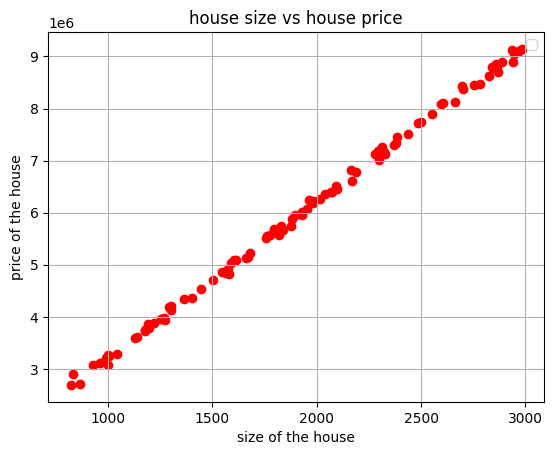

In [24]:
plt.scatter(df['size'],df['houseprice'], color = 'red')
plt.xlabel('size of the house')
plt.ylabel('price of the house')
plt.legend()
plt.grid(True)
plt.title('house size vs house price')
plt.show()

In [25]:
XSorted = np.sort(X,axis=0)
YPred = model.predict(XSorted)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<ipython-input-28-2d5083e6da0a>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


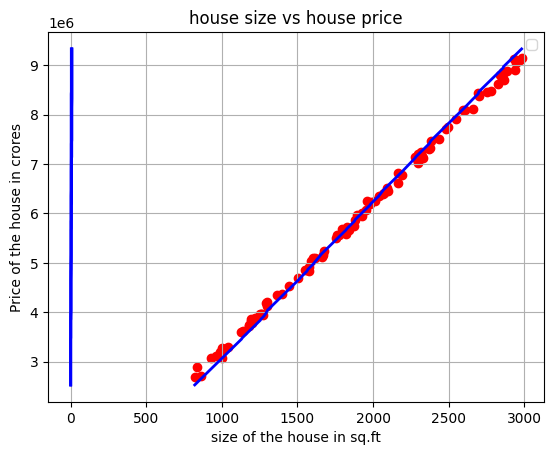

In [28]:
plt.scatter(df['size'],df['houseprice'], color = 'red')
plt.plot(XSorted,YPred, color = 'blue',linewidth = 2)
plt.xlabel('size of the house in sq.ft')
plt.ylabel('Price of the house in crores')
plt.legend()
plt.grid(True)
plt.title('house size vs house price')
plt.show()